In [ ]:
from google.colab import drive

# Mount Google Drive to access the dataset
drive.mount('/content/drive')

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [ ]:
train_dir = '/content/drive/MyDrive/archive/dataset'

In [ ]:
# Define ImageDataGenerator for data augmentation and preprocessing
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=10,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    validation_split=0.3  # Splitting the data into 70% train and 30% validation
)

In [ ]:
# Load and augment train data
train_generator = datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training'  # Specify subset as 'training' for the training set
)

Found 7218 images belonging to 3 classes.


In [ ]:
# Load and augment validation data
validation_generator = datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation'  # Specify subset as 'validation' for the validation set
)

Found 3092 images belonging to 3 classes.


In [ ]:
# Build CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(3, activation='softmax')  # 3 classes: bacterial, viral, normal
])

In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // 32,
    epochs=5,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // 32
)

Epoch 1/5
225/225 [==============================] - 2436s 11s/step - loss: 0.6960 - accuracy: 0.6798 - val_loss: 0.4847 - val_accuracy: 0.8040
Epoch 2/5
225/225 [==============================] - 1157s 5s/step - loss: 0.4053 - accuracy: 0.8357 - val_loss: 0.3534 - val_accuracy: 0.8623
Epoch 3/5
225/225 [==============================] - 1146s 5s/step - loss: 0.3483 - accuracy: 0.8557 - val_loss: 0.3106 - val_accuracy: 0.8770
Epoch 4/5
225/225 [==============================] - 1198s 5s/step - loss: 0.3314 - accuracy: 0.8679 - val_loss: 0.3372 - val_accuracy: 0.8630
Epoch 5/5
225/225 [==============================] - 1168s 5s/step - loss: 0.2968 - accuracy: 0.8816 - val_loss: 0.2838 - val_accuracy: 0.8867


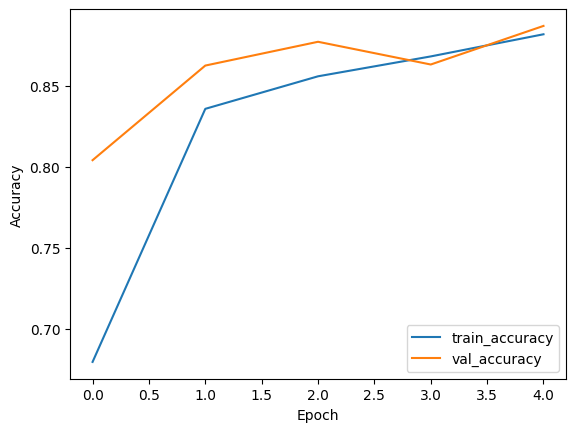

In [ ]:
# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
# Now you can calculate the confusion matrix and other evaluation metrics
test_generator = datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False,  # Set shuffle to False for consistent results in evaluation
    subset='validation'  # Specify subset as 'validation' for the test set
)

Found 3092 images belonging to 3 classes.


In [ ]:
# Predict classes for the test data
predicted_probs = model.predict(test_generator)
predicted_classes = np.argmax(predicted_probs, axis=1)

97/97 [==============================] - 244s 3s/step


In [ ]:
# Get the true labels
true_labels = test_generator.classes

In [ ]:
# Calculate confusion matrix
cm = confusion_matrix(true_labels, predicted_classes)
print('Confusion Matrix:\n', cm)

Confusion Matrix:
 [[ 897  172   19]
 [  47 1009   32]
 [   6   64  846]]
